
SVM Confusion Matrix:
[[50  4]
 [ 2 87]]


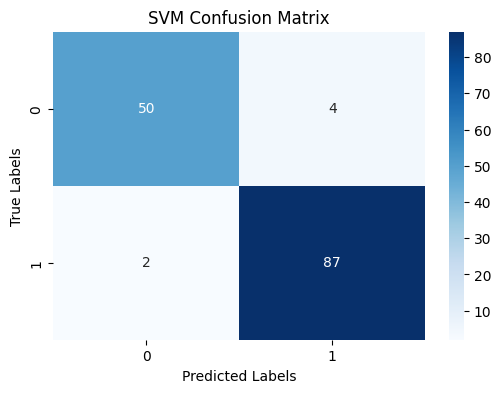


Decision Tree Confusion Matrix:
[[52  2]
 [ 5 84]]


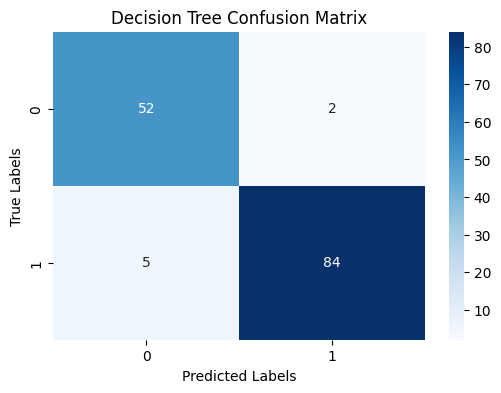


Random Forest Confusion Matrix:
[[51  3]
 [ 1 88]]


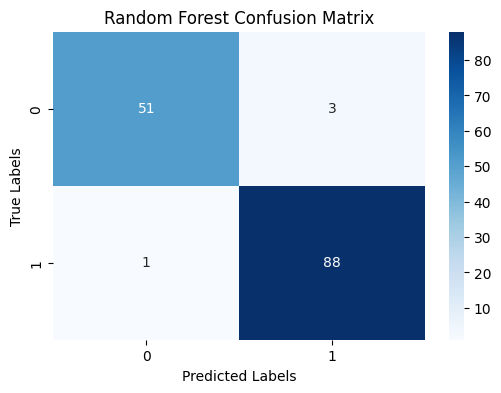


SVM Classification Accuracy: 0.958041958041958
SVM Training Accuracy: 0.9694835680751174
SVM Testing Accuracy: 0.958041958041958

Decision Tree Classification Accuracy: 0.951048951048951
Decision Tree Training Accuracy: 1.0
Decision Tree Testing Accuracy: 0.951048951048951

Random Forest Classification Accuracy: 0.972027972027972
Random Forest Training Accuracy: 1.0
Random Forest Testing Accuracy: 0.972027972027972


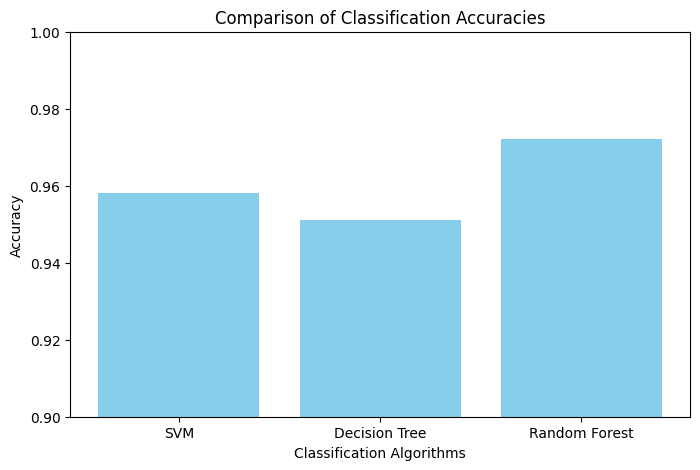

In [5]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# pd.read_csv('/home/caleb/Desktop/CMT434/data 2.csv')

# load the breast cancer dataset

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# split the data into trainings and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42)

# Using the already trained models

# SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_train_accuracy = svm.score(X_train, y_train)
svm_test_accuracy = svm.score(X_test, y_test)

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
dt_pred = decision_tree.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_train_accuracy = decision_tree.score(X_train, y_train)
dt_test_accuracy = decision_tree.score(X_test, y_test)

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
rf_pred = random_forest.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_train_accuracy = random_forest.score(X_train, y_train)
rf_test_accuracy = random_forest.score(X_test, y_test)

# Confusion matrices and heatmaps
models = [svm, decision_tree, random_forest]
predictions = [svm_pred, dt_pred, rf_pred]

for i, model in enumerate(models):
    model_name = ['SVM', 'Decision Tree', 'Random Forest'][i]
    pred = predictions[i]

    print(f"\n{model_name} Confusion Matrix:")
    print(confusion_matrix(y_test, pred))

    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Classification accuracies
accuracies = [svm_accuracy, dt_accuracy, rf_accuracy]
train_accuracies = [svm_train_accuracy, dt_train_accuracy, rf_train_accuracy]
test_accuracies = [svm_test_accuracy, dt_test_accuracy, rf_test_accuracy]

for i, model_name in enumerate(['SVM', 'Decision Tree', 'Random Forest']):
    print(f"\n{model_name} Classification Accuracy:", accuracies[i])
    print(f"{model_name} Training Accuracy:", train_accuracies[i])
    print(f"{model_name} Testing Accuracy:", test_accuracies[i])

# Comparison plot
plt.figure(figsize=(8, 5))
plt.bar(['SVM', 'Decision Tree', 'Random Forest'], accuracies, color='skyblue')
plt.title('Comparison of Classification Accuracies')
plt.xlabel('Classification Algorithms')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)
plt.show()
